In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
)

In [2]:
# Function to simulate a classification problem and evaluate metrics
def simulate_and_plot(imbalance_ratio):
    # Create synthetic dataset
    X, y = make_classification(
        n_samples=2000,            # Total number of samples
        n_features=20,             # Number of features
        n_informative=2,           # Number of informative features
        n_redundant=10,            # Number of redundant features
        n_clusters_per_class=1,
        weights=[imbalance_ratio], # Majority class proportion
        flip_y=0,                  # No label noise
        random_state=42
    )

    # Train a logistic regression model
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)

    # Get predicted probabilities
    y_proba = model.predict_proba(X)[:, 1]

    # Compute metrics
    fpr, tpr, _ = roc_curve(y, y_proba)
    precision, recall, _ = precision_recall_curve(y, y_proba)
    roc_auc = roc_auc_score(y, y_proba)
    avg_precision = average_precision_score(y, y_proba)

    return fpr, tpr, precision, recall, roc_auc, avg_precision

In [3]:
# Different class imbalance ratios to simulate (0.5, 0.9, 0.98)
ratios = [0.5, 0.9, 0.98]
results = [simulate_and_plot(r) for r in ratios]
titles = ['Balanced (50/50)', 'Mild Imbalance (90/10)', 'Severe Imbalance (98/2)']

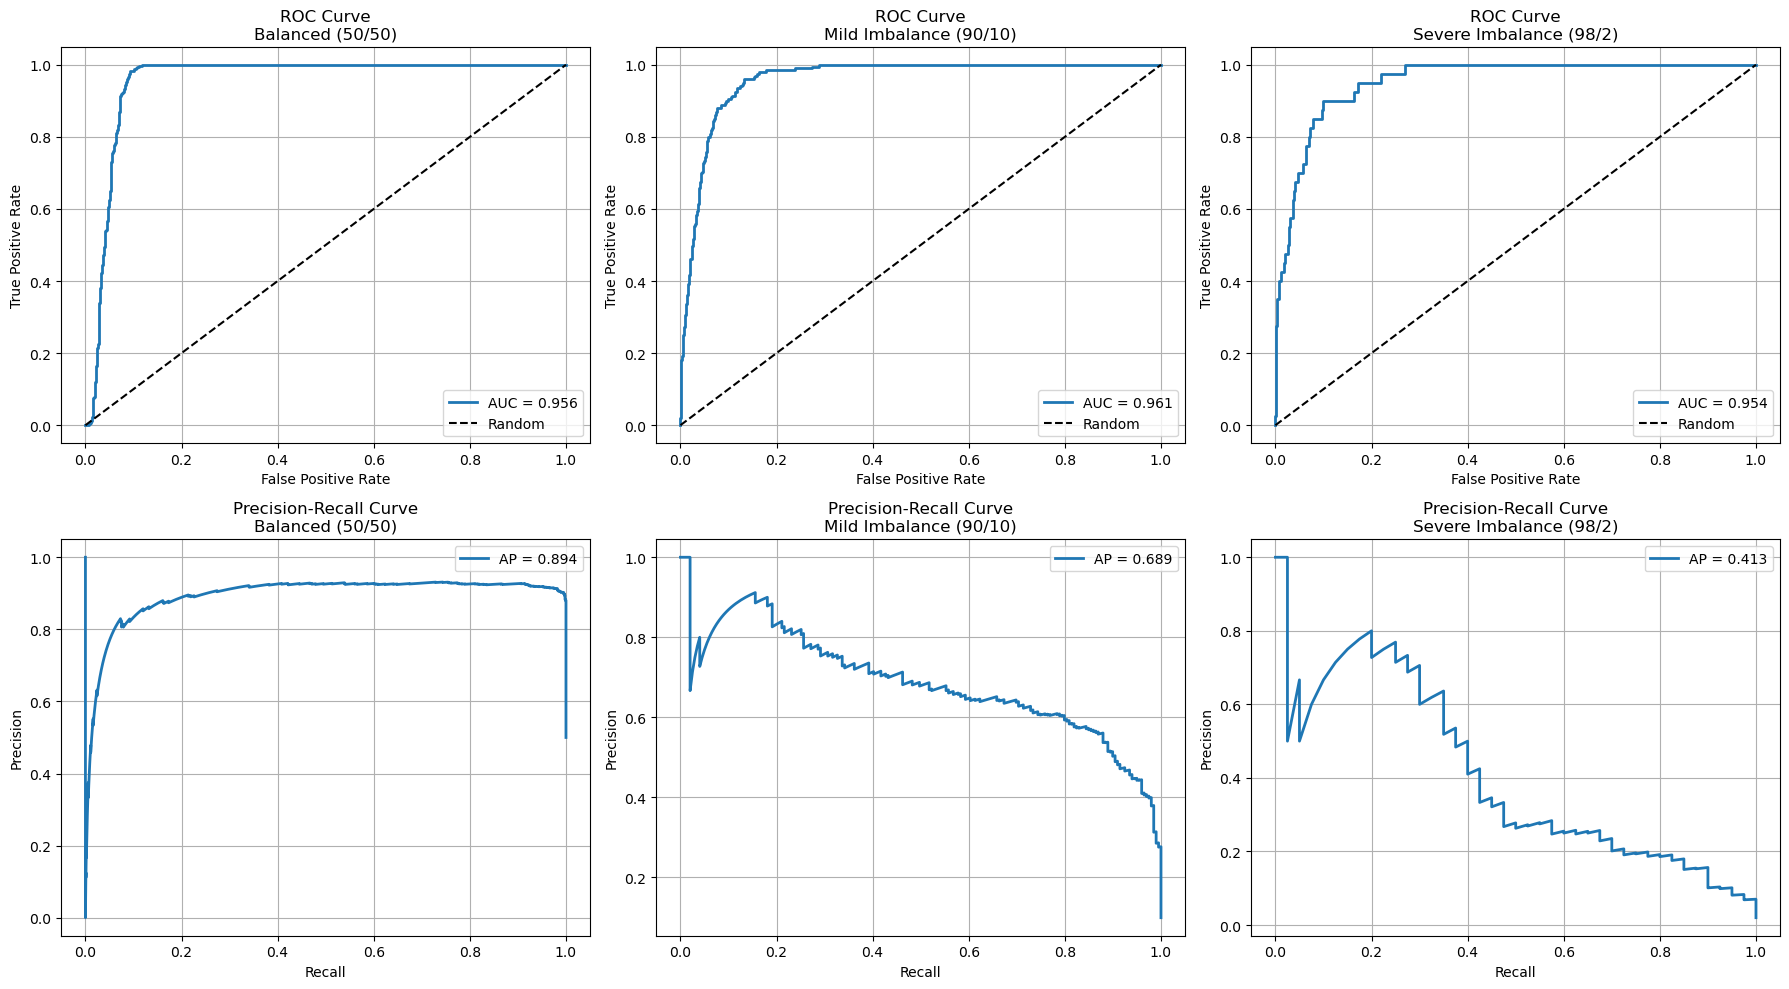

In [4]:
# Plot the results
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, (fpr, tpr, precision, recall, roc_auc, avg_precision) in enumerate(results):
    # ROC Curve
    axes[0, i].plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', linewidth=2)
    axes[0, i].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[0, i].set_title(f'ROC Curve\n{titles[i]}')
    axes[0, i].set_xlabel('False Positive Rate')
    axes[0, i].set_ylabel('True Positive Rate')
    axes[0, i].legend()
    axes[0, i].grid(True)

    # Precision-Recall Curve
    axes[1, i].plot(recall, precision, label=f'AP = {avg_precision:.3f}', linewidth=2)
    axes[1, i].set_title(f'Precision-Recall Curve\n{titles[i]}')
    axes[1, i].set_xlabel('Recall')
    axes[1, i].set_ylabel('Precision')
    axes[1, i].legend()
    axes[1, i].grid(True)

plt.tight_layout()
plt.show()

# Threshold Tuning on Breast Cancer Dataset

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_recall_curve, f1_score
)

In [6]:
# Step 1: Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = benign, 1 = malignant

In [7]:
# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Step 3: Train Model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [9]:
# Step 4: Predict probabilities
y_proba_test = model.predict_proba(X_test)[:, 1]

In [10]:
# Step 5: Compute Precision, Recall, F1 across thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_test)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

In [11]:
# Step 6: Find best threshold
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
print(f"Best Threshold: {best_threshold:.4f}")

Best Threshold: 0.7183


In [12]:
# Step 7: Predict using best threshold
y_pred_thresh = (y_proba_test >= best_threshold).astype(int)

In [13]:
# Step 8: Evaluation
conf_matrix = confusion_matrix(y_test, y_pred_thresh)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_pred_thresh)
print("Classification Report:\n", report)

Confusion Matrix:
 [[ 62   1]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



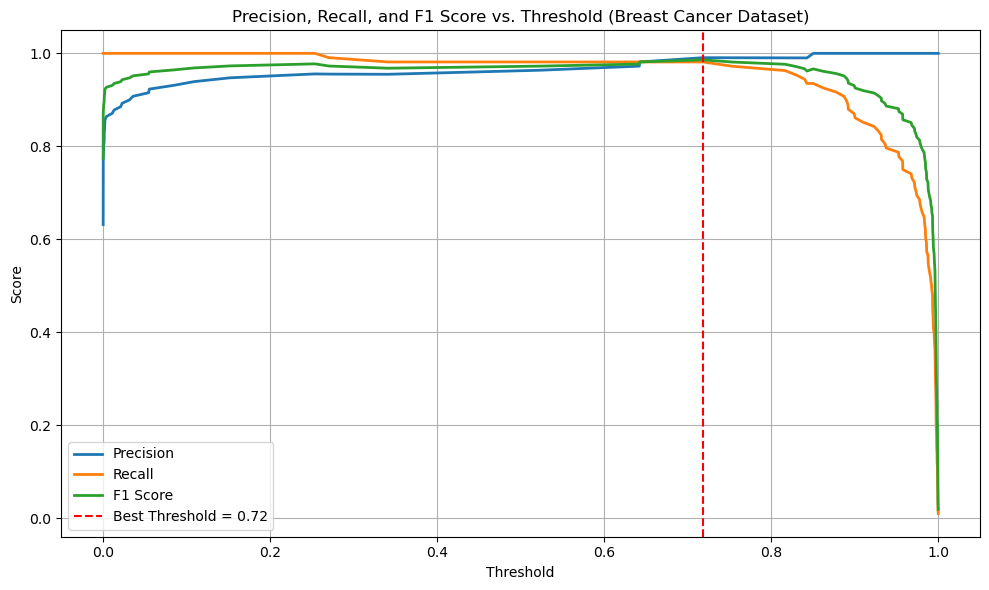

In [14]:
# Step 9: Plot Precision, Recall, F1 Score vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linewidth=2)
plt.plot(thresholds, recall[:-1], label='Recall', linewidth=2)
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', linewidth=2)
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.title('Precision, Recall, and F1 Score vs. Threshold (Breast Cancer Dataset)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()